**Training dataset from 0-9 images using transfer learning with different models with train-90% test-10% split**

In [1]:
!pip install fastai wwf -q --upgrade

     |████████████████████████████████| 194kB 5.6MB/s 
     |████████████████████████████████| 12.8MB 231kB/s 
     |████████████████████████████████| 776.8MB 25kB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 296kB 43.1MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [ ]:
!unzip "/content/drive/MyDrive/iiitdelhi2/task 2.zip"

In [5]:
path = Path('/content/task 2')

In [6]:
np.random.seed(6)

dataset = DataBlock(blocks = (ImageBlock,CategoryBlock),
                    #loading all images
                  get_items = get_image_files,
                  # dividing the dataset randomly into train=90% test=10%
                  splitter = TrainTestSplitter(test_size=0.1),
                  # getting label from folder name
                  get_y = parent_label,
                  #transforming image size = 64
                  item_tfms=Resize(64),
                  #applying augmentation
                  batch_tfms=aug_transforms(do_flip=False, flip_vert=False, max_rotate=10.0, min_zoom=1.0,
                                            max_zoom=1.1, max_lighting=0.2, max_warp=0.2, 
                                            p_affine=0.75, p_lighting=0.75,pad_mode='reflection', min_scale=1.0))

In [7]:
dls = dataset.dataloaders(path)

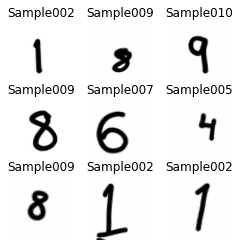

In [8]:
dls.show_batch(max_n=9, figsize=(4,4))

In [9]:
#loading resnet34 dataset with pretrained weights=False
learn = cnn_learner(dls, resnet34,pretrained=True, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [10]:
learn.fit(10, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.750795,2.373372,0.625000,0.375000,00:07
1,1.985223,1.315704,0.425000,0.575000,00:06
2,1.636916,1.000186,0.350000,0.650000,00:06
3,1.410754,1.019502,0.225000,0.775000,00:06
4,1.253276,0.816450,0.225000,0.775000,00:06
5,1.119781,0.686744,0.250000,0.750000,00:07
6,0.989364,0.514810,0.200000,0.800000,00:06
7,0.887006,0.317712,0.175000,0.825000,00:06
8,0.816220,0.224393,0.100000,0.900000,00:07
9,0.748480,0.171644,0.075000,0.925000,00:06


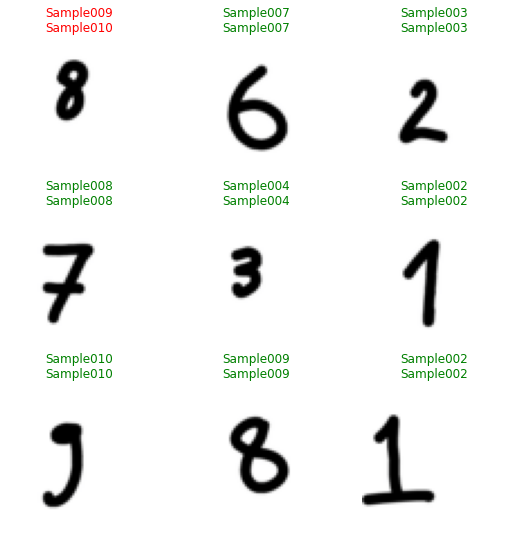

In [11]:
learn.show_results()

In [12]:
learn.save('model2-resnet34')

Path('models/model2-resnet34.pth')

In [16]:
learn.export(fname='model2-resnet34.pkl')

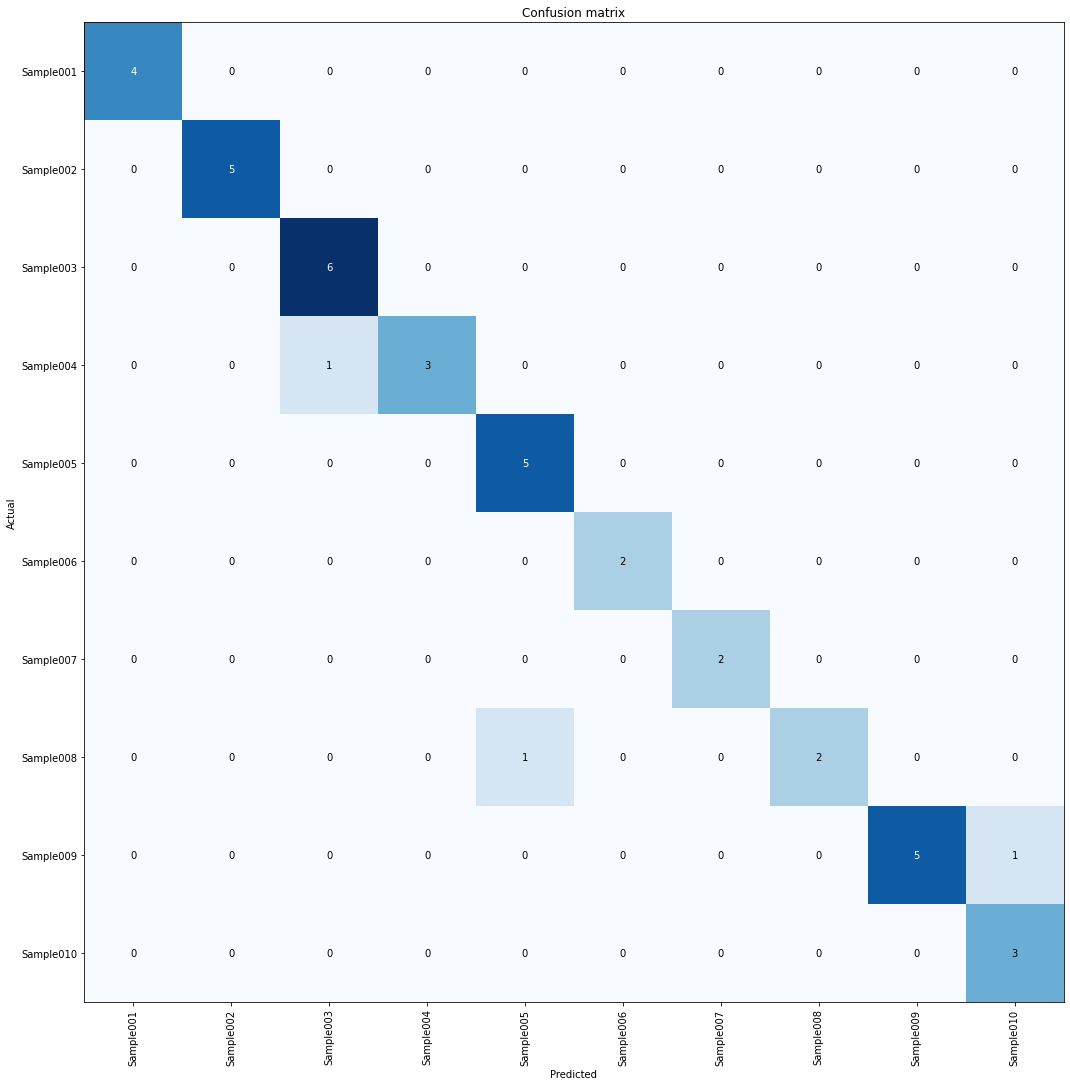

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(15,15))

In [17]:
#loading resnet34 dataset with pretrained weights=False
learn = cnn_learner(dls, resnet50,pretrained=True, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [18]:
learn.fit(10, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.526951,6.241740,0.750000,0.250000,00:07
1,1.872113,4.908198,0.575000,0.425000,00:06
2,1.562276,2.156045,0.325000,0.675000,00:06
3,1.361357,1.825909,0.400000,0.600000,00:06
4,1.183214,1.124499,0.325000,0.675000,00:06
5,1.042699,0.703916,0.225000,0.775000,00:06
6,0.935474,0.571839,0.150000,0.850000,00:06
7,0.841114,0.497382,0.100000,0.900000,00:06
8,0.763929,0.386256,0.100000,0.900000,00:06
9,0.699034,0.394961,0.100000,0.900000,00:06


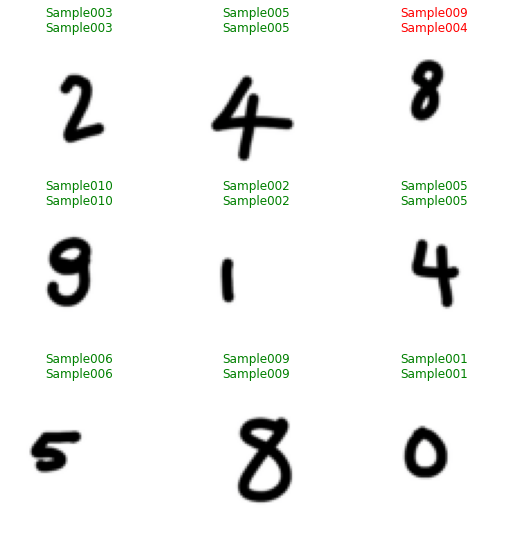

In [19]:
learn.show_results()

In [20]:
learn.save('model2-resnet50')

Path('models/model2-resnet50.pth')

In [21]:
learn.export(fname='model2-resnet50.pkl')

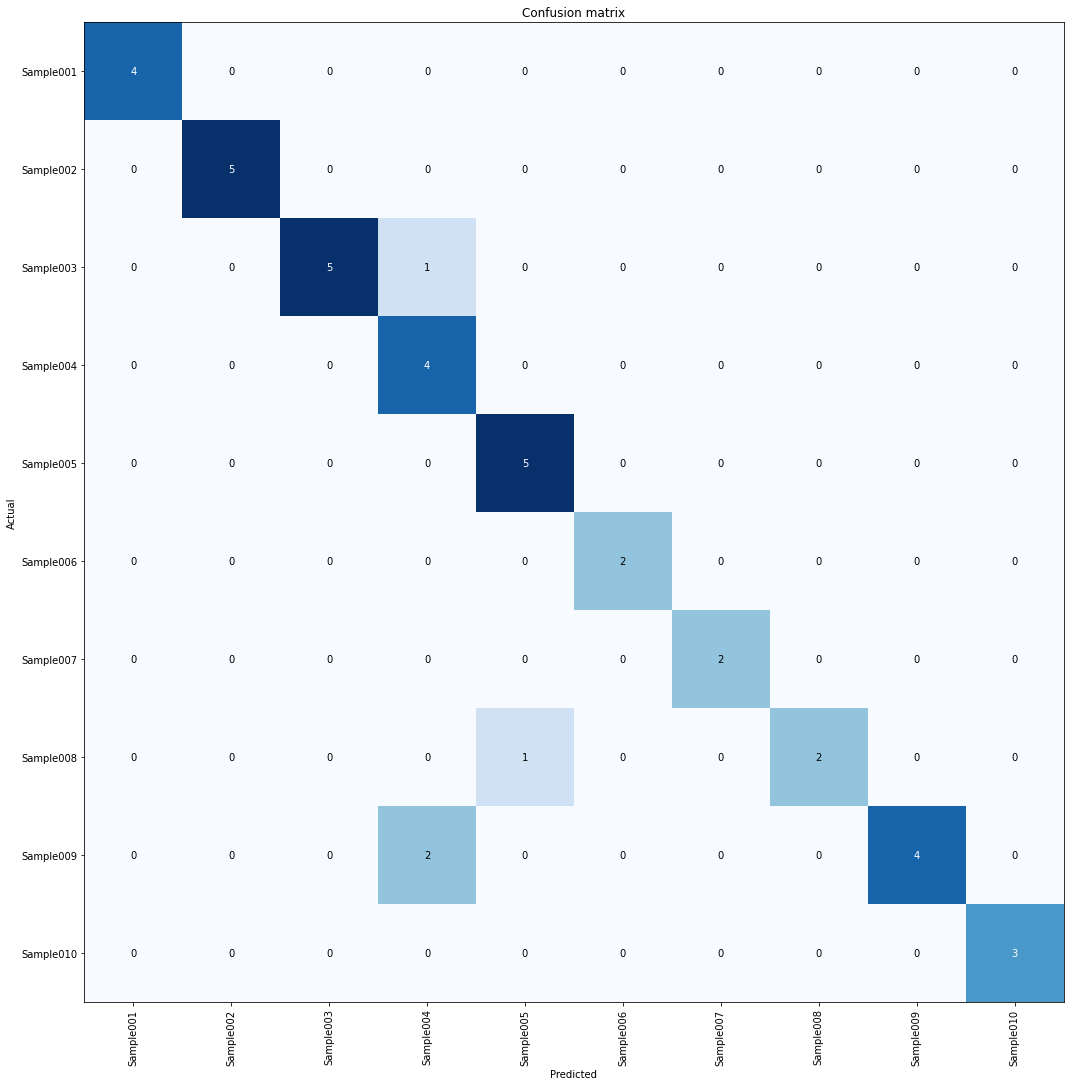

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(15,15))

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.004365158267319202)

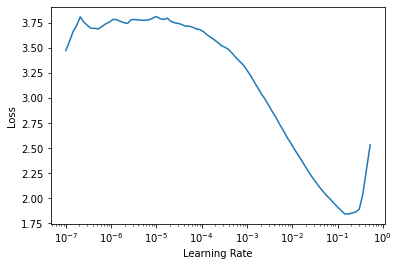

In [24]:
#loading resnet34 dataset with pretrained weights=False
learn = cnn_learner(dls, vgg16_bn,pretrained=True, metrics=[error_rate,accuracy])
#finding learning rate
learn.lr_find()

In [25]:
learn.fit(10, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.261694,1.869970,0.650000,0.350000,00:07
1,1.571055,1.405797,0.475000,0.525000,00:06
2,1.195513,0.936189,0.375000,0.625000,00:06
3,0.999164,0.727424,0.275000,0.725000,00:06
4,0.863877,0.477582,0.150000,0.850000,00:06
5,0.742498,0.276195,0.075000,0.925000,00:06
6,0.648847,0.220862,0.050000,0.950000,00:06
7,0.575463,0.224431,0.075000,0.925000,00:06
8,0.525676,0.244372,0.050000,0.950000,00:06
9,0.469376,0.261349,0.075000,0.925000,00:06


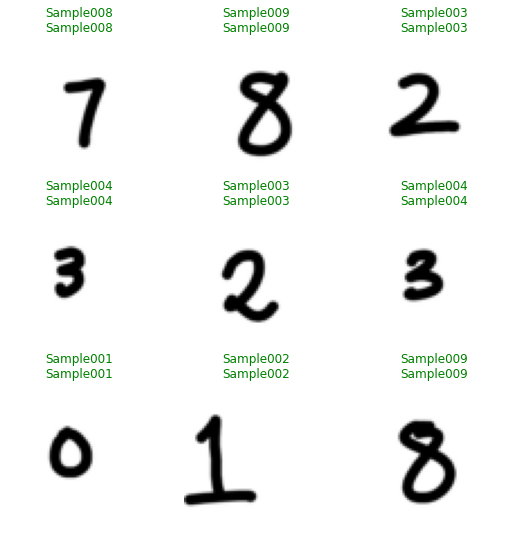

In [26]:
learn.show_results()

In [27]:
learn.save('model2-vgg16')
learn.export(fname='model2-vgg16.pkl')

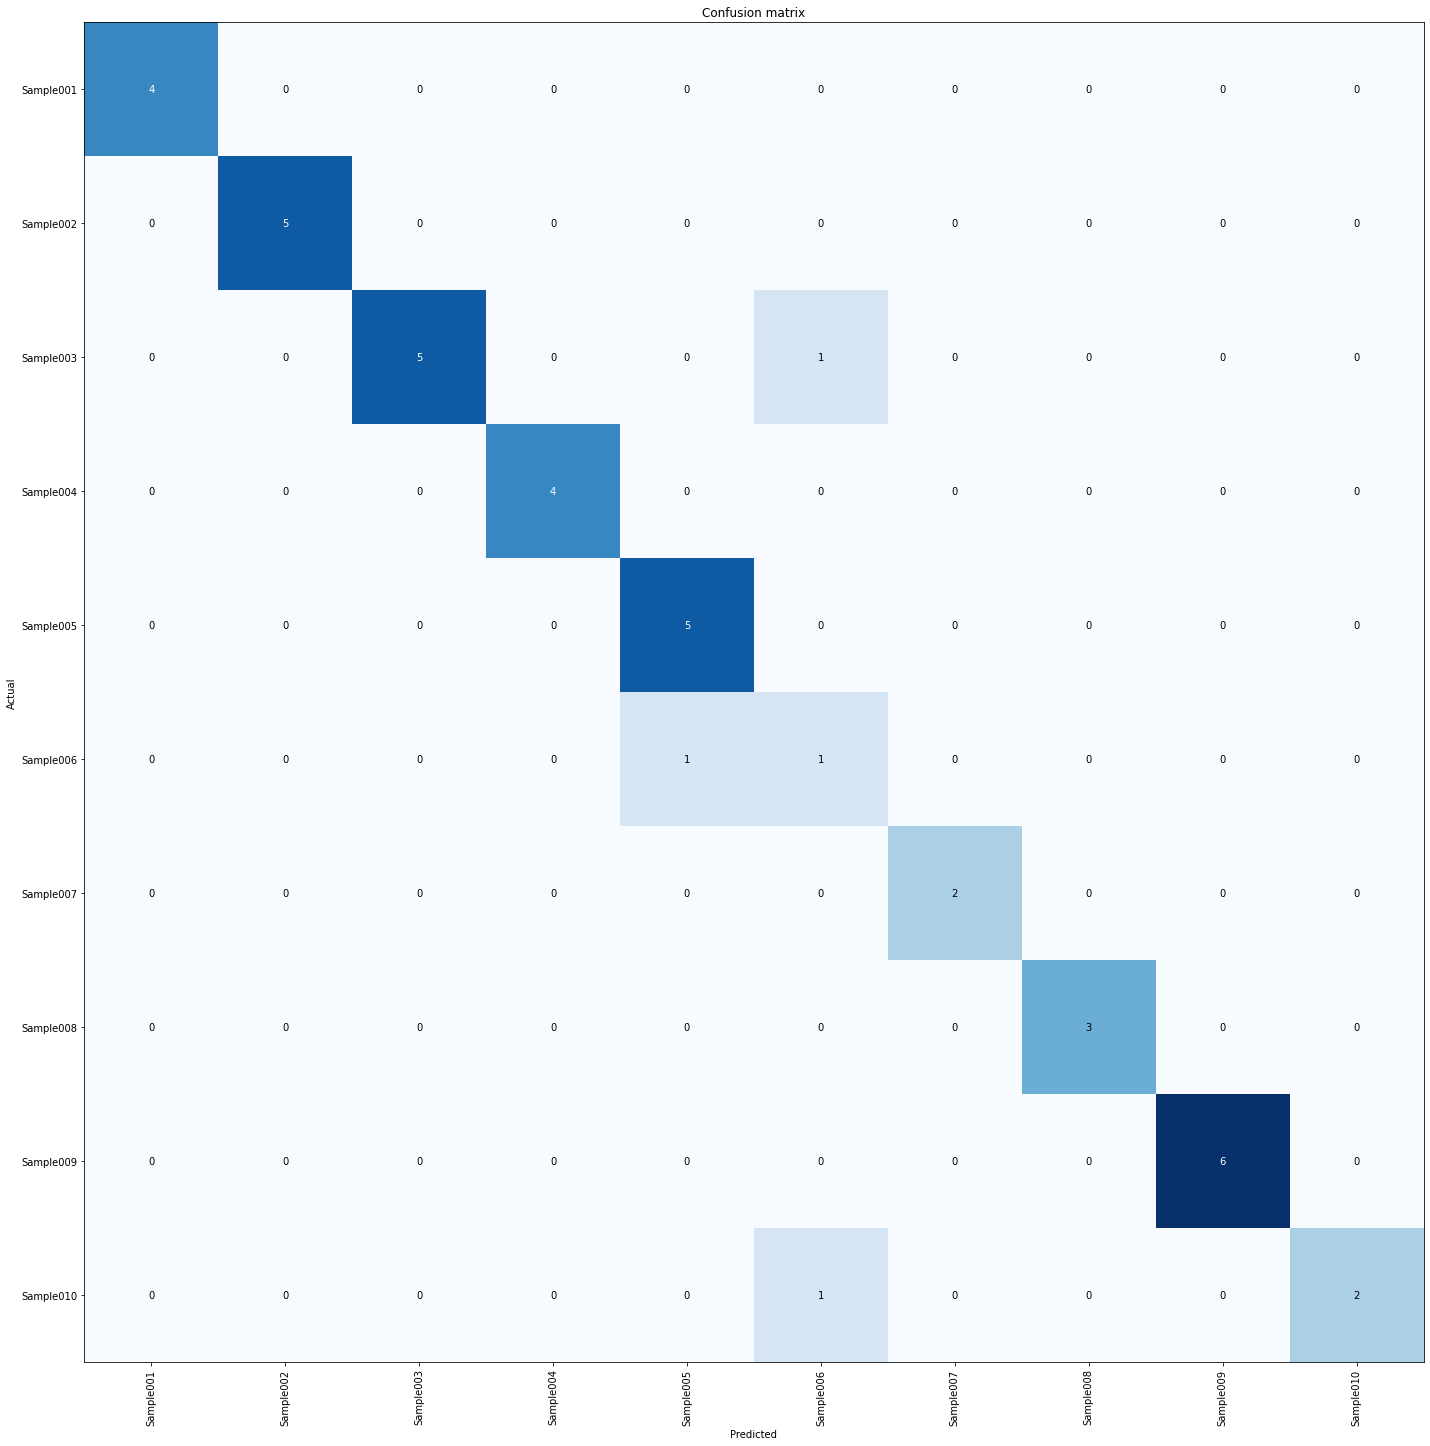

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(20,20))